In [16]:
from KernelTools import vectorize_kfunc,dxx_k,make_block
from Kernels import (
    get_centered_scaled_poly_kernel,
    get_anisotropic_gaussianRBF,
    fit_kernel_params,
    get_matern
)
from Kernels import get_gaussianRBF
import jax
jax.config.update('jax_enable_x64',True)
import jax.numpy as jnp
import matplotlib.pyplot as plt
from scipy.special import factorial

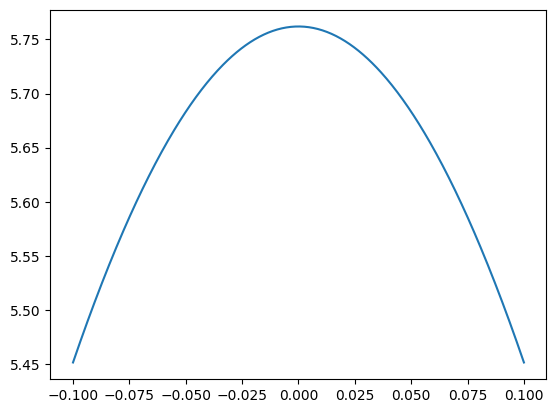

: 

In [17]:
def get_matern(p,rho):
    """
        Builds a Matern kernel function.

        Args:
            p (int): As used in smoothness nu = p + 1/2.
            rho (double): Length scale of the Matern kernel.

        Returns:
            function: This function returns the Matern kernel with smoothness p+1/2 and lengthscale rho.   
    """
    exp_multiplier = -jnp.sqrt(2 * p + 1)
    coefficients = jnp.array([factorial(p + i) / (factorial(i) * factorial(p - i)) * (jnp.sqrt(8 * p + 4))**(p - i) for i in range(p + 1)])
    powers = jnp.arange(p,-1,-1)
    norm_cons = factorial(p)/factorial(2*p)
    def k(x,y):
        # True 
        d2 = jnp.sum((x-y)**2)/rho**2
        d = jnp.sqrt(d2+1e-100)
        true =  norm_cons*jnp.sum(coefficients * jnp.power(d,powers))*jnp.exp(exp_multiplier * d)
        #  Taylor
        nu = p + 1/2
        taylor = 1 + (nu/(2*(1-nu))*d2 + nu**2/(8*(2-3*nu+nu**2))*(d2)**2)
        return jnp.where(d2<1e-12, taylor, true)
    return k


k = get_matern(5,1.)


vkphi = vectorize_kfunc(dxx_k(dxx_k(k,0),1))
n = 500
zero = jnp.array([[0,0.]])
grid = jnp.vstack([jnp.zeros(n),jnp.linspace(-0.1,.1,n)]).T
plt.plot(grid[:,1],make_block(k,dxx_k,dxx_k)(zero,grid)[0])

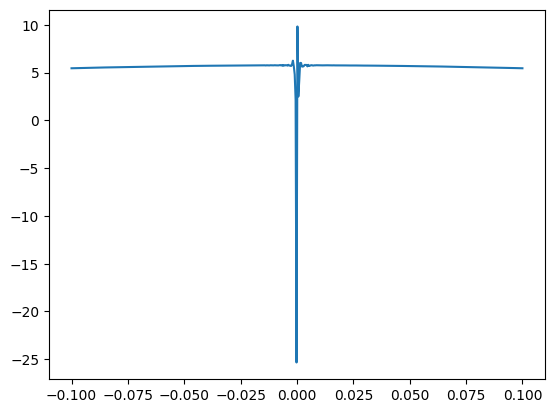

In [ ]:
n = 500
grid = jnp.vstack([jnp.zeros(n),jnp.linspace(-5,5,n)]).T

k = get_gaussianRBF(1.)
K_rbf = vectorize_kfunc(k)(grid,grid)


k = get_matern(5,1.)
K_matern= vectorize_kfunc(k)(grid,grid)

#K = make_block(k,dxx_k,dxx_k)(grid,grid)
